Jeremiah Maller
Machine Learning
Project 2
5/1/17

Movie review data containing the full text of reviews and a binary indicator (1 for positive reviews, 0 for negative reviews) was gathered from the Internet Movie Data Base (IMDB). Machine learning models and Natural Language Processing techniques have been applied to the text of this corpus of reviews to predict based on the content of the text whether the review is positive or negative. A comparison of the accuracy of each of these models follows: The Null Model, The Naive Bayes (NB) Model with 1-grams and 2-grams, The NB Model with stopwords removed, The NB Model with stopwords removed and reduced to 100 most important features, The NB Model with 1-grams and 2-grams and limiting features to 10,000, The NB Model with tokens weighted by Term Frequency Inverse Document Frequency (TF-IDF), and The Random Forest Model. An analysis of the results and the advantages and disadvantages of each of these models follows at the end of this document.

In [1]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline



/Users/jmaller/anaconda2/envs/econ/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Unless otherwise noted, this code is based on modifications of code from kaggle.com (full url below),
# and Mario Carrillo, and Justin Malunay from their lecture and lab notebooks on NLP
# Code from Kaggle https://www.kaggle.com/c/word2vec-nlp-tutorial/
# Use the "read_csv" function to read the labeled training data
train = pd.read_csv('/Users/jmaller/Desktop/ECON628-01-rjmaller/datasets/imdb_kaggle/labeledTrainData.tsv', header=0, \
                    delimiter="\t", quoting=3)

In [3]:
train.shape
train.columns.values

array(['id', 'sentiment', 'review'], dtype=object)

In [4]:
train.head(2)

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."


In [5]:
#print train["review"][0]

In [6]:
# define X and y
X = train.review
y = train.sentiment
print y.value_counts(normalize=True)
print ''
print X.shape, y.shape


1    0.5
0    0.5
Name: sentiment, dtype: float64

(25000,) (25000,)


In [7]:
# Split into test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(17500,) (17500,)
(7500,) (7500,)


In [8]:
# Tokenization
##############################################################################
# use CountVectorizer to create document-term matrices from X_train and X_test
##############################################################################

vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [9]:
# Term Frequency
vect = CountVectorizer()
dtm = vect.fit_transform(X_train)
tf = pd.DataFrame(dtm.toarray(), columns=vect.get_feature_names())
tf

,00,000,00001,00015,000s,001,006,007,0079,0080,...,émigré,émigrés,était,état,étc,évery,êxtase,østbye,über,üvegtigris
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# rows are documents, columns are terms (phrases) (aka "tokens" or "features")
print X_train_dtm.shape
print X_test_dtm.shape

(17500, 64709)
(7500, 64709)


In [11]:
# first 50 features
print vect.get_feature_names()[:50]

[u'00', u'000', u'00001', u'00015', u'000s', u'001', u'006', u'007', u'0079', u'0080', u'0083', u'0093638', u'00am', u'00pm', u'00s', u'01', u'01pm', u'02', u'020410', u'029', u'03', u'04', u'041', u'05', u'06', u'06th', u'07', u'08', u'087', u'08th', u'09', u'0ne', u'10', u'100', u'1000', u'1000lb', u'1000s', u'1001', u'100m', u'100mph', u'100s', u'100th', u'100x', u'100yards', u'101', u'101st', u'102', u'102nd', u'103', u'104']


In [12]:
# last 50 features
print vect.get_feature_names()[-50:]

[u'zuckers', u'zues', u'zugsmith', u'zukhov', u'zukovic', u'zulu', u'zulus', u'zumhofe', u'zungia', u'zuni', u'zuniga', u'zunz', u'zurich', u'zuzz', u'zvezda', u'zvonimir', u'zvyagvatsev', u'zwartboek', u'zwick', u'zyada', u'zz', u'zzzz', u'zzzzz', u'zzzzzzzz', u'zzzzzzzzzzzz', u'zzzzzzzzzzzzz', u'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz', u'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz', u'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz', u'z\xe9', u'\xe1lex', u'\xe1lvaro', u'\xe1ngel', u'\xe1ngela', u'\xe2me', u'\xe5ge', u'\xe5m\xe5l', u'\xe6sthetic', u'\xe9cran', u'\xe9lan', u'\xe9migr\xe9', u'\xe9migr\xe9s', u'\xe9tait', u'\xe9tat', u'\xe9tc', u'\xe9very', u'\xeaxtase', u'\xf8stbye', u'\xfcber', u'\xfcvegtigris']


In [13]:
# show vectorizer options
vect

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [14]:
#Create a count vectorizer that doesn't lowercase the words
vect = CountVectorizer(lowercase=False)
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm.shape # has more features

(17500, 80439)

In [15]:
# first 5000 features
print vect.get_feature_names()[:5000]

[u'00', u'000', u'00001', u'00015', u'000s', u'001', u'006', u'007', u'0079', u'0080', u'0083', u'0093638', u'00PM', u'00am', u'00s', u'01', u'01pm', u'02', u'020410', u'029', u'03', u'04', u'041', u'05', u'06', u'06th', u'07', u'08', u'087', u'08th', u'09', u'0ne', u'10', u'100', u'1000', u'1000lb', u'1000s', u'1001', u'100m', u'100mph', u'100s', u'100th', u'100x', u'100yards', u'101', u'101st', u'102', u'102nd', u'103', u'104', u'1040s', u'105', u'105lbs', u'106', u'107', u'108', u'109', u'10PM', u'10am', u'10lines', u'10mil', u'10min', u'10minutes', u'10p', u'10pm', u'10s', u'10th', u'10x', u'10yr', u'11', u'110', u'1100', u'1100ad', u'112', u'114', u'115', u'116', u'117', u'11F', u'11M', u'11th', u'12', u'120', u'1200', u'1200F', u'1201', u'1202', u'123', u'125', u'127', u'128', u'12A', u'12M', u'12hr', u'12mm', u'12s', u'12th', u'13', u'130', u'1300', u'1300s', u'131', u'132', u'134', u'135', u'135m', u'136', u'139', u'13TH', u'13k', u'13s', u'13th', u'14', u'140', u'140HP', u'141

In [16]:
# last 5000 features
print vect.get_feature_names()[-5000:]

[u'thankfully', u'thanking', u'thankless', u'thanklessly', u'thanks', u'thankyou', u'thanx', u'thar', u'that', u'that_', u'thatched', u'thats', u'thatz', u'thaw', u'thawing', u'thaws', u'thay', u'the', u'theBg', u'theater', u'theaters', u'theathre', u'theatre', u'theatregoers', u'theatres', u'theatrical', u'theatricality', u'theatrically', u'theatrics', u'thee', u'theese', u'theft', u'thefts', u'thehollywoodnews', u'their', u'theirs', u'them', u'thematic', u'thematically', u'thematics', u'theme', u'themed', u'themes', u'themself', u'themselfs', u'themselves', u'themsleves', u'then', u'thenceforth', u'thenewamerican', u'theocratic', u'theologian', u'theological', u'theologically', u'theology', u'theoretical', u'theoretically', u'theories', u'theorist', u'theorists', u'theorized', u'theorizing', u'theory', u'theowinthrop', u'ther', u'therapeutic', u'therapies', u'therapist', u'therapists', u'therapy', u'there', u'thereabouts', u'thereafter', u'thereby', u'therefore', u'therein', u'therei

In [17]:
# Set ngram range
# include 1-grams, 2-grams, and 3-grams
vect = CountVectorizer(ngram_range=(1, 2))
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm.shape

(17500, 1169523)

In [18]:
# last 50 features
print vect.get_feature_names()[-50:]

[u'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz br', u'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz', u'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz br', u'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz', u'z\xe9', u'z\xe9 rodrix', u'\xe1lex', u'\xe1lex de', u'\xe1lvaro', u'\xe1lvaro de', u'\xe1ngel', u'\xe1ngel garc\xeda', u'\xe1ngela', u'\xe1ngela molina', u'\xe2me', u'\xe2me from', u'\xe2me ton', u'\xe5ge', u'\xe5ge bringsv\xe6rd', u'\xe5m\xe5l', u'\xe5m\xe5l goldfish', u'\xe6sthetic', u'\xe6sthetic these', u'\xe9cran', u'\xe9cran where', u'\xe9lan', u'\xe9lan by', u'\xe9migr\xe9', u'\xe9migr\xe9 devises', u'\xe9migr\xe9 from', u'\xe9migr\xe9s', u'\xe9migr\xe9s relocated', u'\xe9tait', u'\xe9tait rien', u'\xe9tait une', u'\xe9tat', u'\xe9tat knowingly', u'\xe9tc', u'\xe9tc other', u'\xe9very', u'\xe9very scene', u'\xeaxtase', u'\xeaxtase ecstasy', u'\xf8stbye', u'\xf8stbye is', u'\xfcber', u'\xfcber alles', u'\xfcber annoying', u'\xfcvegtigris', u'\xfcvegtigris so']


In [19]:
# Predicting Movie Rating with Native Bayes
from sklearn.naive_bayes import MultinomialNB 

In [20]:
#test model on the whole data then do a cross valdiation
vect = CountVectorizer()
Xdtm = vect.fit_transform(X)
nb = MultinomialNB()
nb.fit(Xdtm, y)
nb.score(Xdtm, y)

0.89812000000000003

In [21]:
# make a countvectorizer in preparation to split, train, and test the data
vect = CountVectorizer()
# create document-term matrices
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

# Use Naive Bayes to predict whether a review is positive or negatie for reviews in the testing set
# and calculate the accuracy.
# use multinomial naive bayes with document feature matrix, NOT the text column
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)
# calculate accuracy
print metrics.accuracy_score(y_test, y_pred_class)

0.846533333333


In [22]:
# calculate null accuracy, which is the accuracy of our null model (just guessing the most common thing)
# calculates the accuracy of guessing at random
print y_test.value_counts(normalize=True)
print y_test.value_counts(normalize=False)

1    0.506533
0    0.493467
Name: sentiment, dtype: float64
1    3799
0    3701
Name: sentiment, dtype: int64


In [23]:
# Use our Naive Bayes Countvectorizer model to predict on new text
new_text = ["From the drab 1995 cyberthriller “The Net” onward, mainstream American movies have been hard-pressed to pertinently weigh in on the internet and its discontents. Yes, comedies are regularly larded with “old folks can’t tweet” and “these darn kids and their ‘texting’” jokes, while espionage thrillers invariably serve up hot webcam action. But few pictures attempt to take a hard look at what it all means — perhaps because the entertainment business has some resentment about its digital usurpation."]
new_text_transform = vect.transform(new_text)

In [24]:
nb.predict(new_text_transform)

array([1])

In [25]:
# Use Naive Bayes classification model with 1-grams and 2-grams
# Define a function, tokenize_test,  that does five things:
def tokenize_test(vect):
    nb = MultinomialNB()
    # in above line could specify any model in place of MultinomialNB
    X_dtm = vect.fit_transform(X)
    print 'Features: ', X_dtm.shape[1]
    print 'Accuracy: ', cross_val_score(nb, X_dtm, y, cv=5, scoring='accuracy').mean()
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 2))
tokenize_test(vect)

Features:  1513832
Accuracy:  0.88012


In [26]:
# show vectorizer options
vect

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [27]:
# show the set of stop words
print vect.get_stop_words()

None


In [28]:
# Use stopword removal to remove common words that will likely appear in any text 
# because they don't tell us much about the text
# remove English stop words
vect = CountVectorizer(stop_words='english', ngram_range=(1, 2))
tokenize_test(vect)


Features:  1759290
Accuracy:  0.87464


In [29]:
# Exploring other countvectorizer options
# Remove English stop words and only keep 100 features, MUCH FASTER
vect = CountVectorizer(stop_words='english', max_features=100)
tokenize_test(vect)

Features:  100
Accuracy:  0.71116


In [30]:
# Show 100 most important features in predicting positive and negative movie reviews
# all 100 features
print vect.get_feature_names()
## We continue building count vectorizer throughout this exercise

[u'10', u'acting', u'action', u'actors', u'actually', u'away', u'bad', u'best', u'better', u'big', u'bit', u'br', u'cast', u'character', u'characters', u'come', u'comedy', u'day', u'did', u'didn', u'director', u'does', u'doesn', u'don', u'end', u'fact', u'family', u'far', u'feel', u'film', u'films', u'funny', u'gets', u'girl', u'going', u'good', u'got', u'great', u'guy', u'horror', u'interesting', u'isn', u'just', u'kind', u'know', u'life', u'like', u'little', u'll', u'long', u'look', u'lot', u'love', u'make', u'makes', u'making', u'man', u'minutes', u'movie', u'movies', u'music', u'new', u'old', u'original', u'people', u'performance', u'plot', u'point', u'pretty', u'probably', u'quite', u'real', u'really', u'right', u'role', u'saw', u'say', u'scene', u'scenes', u'script', u'seen', u'series', u'story', u'thing', u'things', u'think', u'thought', u'time', u'times', u'tv', u've', u'want', u'watch', u'watching', u'way', u'woman', u'work', u'world', u'years', u'young']


In [31]:
# include 1-grams and 2-grams, and limit the number of features
vect = CountVectorizer(ngram_range=(1, 2), max_features=10000)
tokenize_test(vect)

Features:  10000
Accuracy:  0.84872


In [32]:
# Include 1-grams and 2-grams, and only include terms that appear at least 3 times
# Anything feature (word) occurs less than 3 times is excluded
vect = CountVectorizer(ngram_range=(1, 2), min_df=3)
tokenize_test(vect)

Features:  267846
Accuracy:  0.87812


In [33]:
# We use stemming and lemmatization to reduce each word to its base/stem/root form because it often 
# makes sense to treat related words the same way
# Initialize stemmer
stemmer = SnowballStemmer('english')


In [34]:
# Derive the canonical form ('lemma') of a word. It can be better than stemming. 
# It uses a dictionary-based approach (slower than stemming) and it understands Octapi is the plural of Octapus
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

In [40]:
# define a function that accepts text and returns a list of lemmas
def word_tokenize_stem(text):
    words = TextBlob(text).words
    return [stemmer.stem(word) for word in words]

def word_tokenize_lemma(text):
    words = TextBlob(text).words
    return [word.lemmatize() for word in words]

In [58]:
# use word_tokenize LEMMA as the feature extraction function (WARNING: SLOW!)
# this will lemmatize each word
#vect = CountVectorizer(analyzer=word_tokenize_lemma)
#tokenize_test(vect)

In [54]:
# use word_tokenize STEM as the feature extraction function (WARNING: SLOW!)
# this will stem each word
##vect = CountVectorizer(analyzer=word_tokenize_lemma)
##tokenize_test(vect)

In [50]:
#nltk.download()
#import textblob.download_corpora

In [38]:
#import re
# Remove non-letters from our data
#letters_only = re.sub("[^a-zA-Z]", " ",X)
##for entry in X:
##    (' '.join(map(lambda s: re.sub("[^a-zA-Z]",' ',s),X)))
##X_train[0]

In [39]:
# Split into test and train data
##X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)
##print X_train.shape, y_train.shape
##print X_test.shape, y_test.shape

# Remove non-letters from our index of vector features
##    letters_only = re.sub("[^a-zA-Z]", " ", review_text)

In [61]:
#TFIDF - Term Frequency Inverse Document Frequency
# Computes "relative frequency" that a word appears in a document compared to its frequency across all documents
# TFIDF is more useful than "term frequency" for identifying "important" words in each document 
#(high frequency in that document, low frequency in other documents). 
# Using TF-IDF to predict whether a movie review is positive or negative:
# Generating a Term Frequency Matrix
vect = CountVectorizer()
tf = pd.DataFrame(vect.fit_transform(X_train).toarray(), columns=vect.get_feature_names())

In [62]:
# Creating a document-term matrix using TF-IDF
vect = TfidfVectorizer(stop_words='english')
dtm = vect.fit_transform(X)
features = vect.get_feature_names()
dtm.shape

(25000, 74538)

In [63]:
vect = TfidfVectorizer(stop_words='english')
tokenize_test(vect)

Features:  74538
Accuracy:  0.8644


In [68]:
# We will print the confusion matrix, and calculate the sensitivity and specificity of the TF-IDF classification method
# print the confusion matrix
print metrics.confusion_matrix(y_test, y_pred_class)

[[3251  450]
 [ 701 3098]]


In [164]:
# Sensitivity is the ability of this method to correctly categorize positive reviews (true positive rate)
# Calculate sensitivity
3098 / float(3098 + 701)
#
#
#
#

0.8154777573045539

In [70]:
# Specificity is the ability of the test to correctly categorize negative reviews (true negative rate)
# Calculate specificity
3251 / float(3251 + 450)

0.8784112402053499

In [ ]:
# We conclude that the model is better at predicting negative reviews than positive reviews
# This makes sense intuitively, a more limited vocabulary is used to describe bad movies in reviews

In [71]:
# Browse through the review text for some of the false positives and false negatives
# first 10 false positives (meaning they were incorrectly classified as 5-star reviews)
X_test[y_test < y_pred_class][:10]

24964    "Something I really love about this woman's sh...
21674    "Three story lines and not enough tying them t...
9632     "Watching Tom Hanks as a hit man for the Irish...
18855    "Something to Sing About was produced at Grand...
9090     "I recently saw this at the 2009 Palm Springs ...
19650    "I watched this hoping to find out something I...
6718     "Even though an animated film it really bored ...
14591    "I rented this film out having heard of the fu...
11184    "I was very excited when this series premiered...
17754    "In one respect, it's like 'The Wizard of Oz,'...
Name: review, dtype: object

In [74]:
# Example of a negative review that was miscategorized as a positive review by this model
print X_test[19650] 

"I watched this hoping to find out something I didn`t know about modern history`s most infamous man and couldn`t help thinking that history has been rewritten in HITLER:THE RISE OF EVIL . Hitler was so obsessed with his niece that he threatened to have one of her admirer`s shot . Hitler turned up with a gun in his hand to arrest Ernst Rohm . Forgive me for asking but haven`t the writers confused Adolph Hitler with Tony Montana from SCARFACE ? That`s bad enough but what really offended me was that there`s entire chunks of historical context missing in this mini series . Germany lost the first world war and the allied powers made Germany pay a heavy price for doing so. It was this economic environment that led the German people to have someone - anyone - to restore their pride and that`s why they turned to Nazism . The German humiliation of the 1920s caused by the allied powers seems to be entirely missing therefore there is no way that HITLER:THE RISE OF EVIL can be taken seriously as a

In [77]:
# In the case of these false positives, the model is reacting to the words "love", "excited", 
# "charasmatic", "positive", and "seductive"

In [78]:
# First 10 false negatives (meaning they were incorrectly classified as negative reviews)
X_test[y_test > y_pred_class][:10]

21140    "This short is a puzzlement. Words fail me her...
12285    "This movie is completely ridiculous. Not only...
3676     "What an overlooked 80's soundtrack. I imagine...
11967    "I saw this in Detroit in what must have been ...
7510     "Ah, I loved this movie. I think it had it all...
3713     "I love the Satan Pit!!! David Tennant is such...
4734     "Dream Quest was a surprisingly good movie. Th...
13340    "If you want a serious laugh pain, watch this ...
20063    "It appears even the director doesn't like thi...
13638    "I don't have much to add to my summary, this ...
Name: review, dtype: object

In [79]:
print X_test[7510]

"Ah, I loved this movie. I think it had it all. It made me laugh out loud over a dozen of times. Yes, I am a girl, so I'm writing this from a girl's perspective. I think it's a shame it only scored 5.2 in rating. Too many guys voting? It was far above other romantic comedies. Just because I'm female I don't enjoy all chic flicks, on the contrary I prefer other genres. Romantic comedies tend to be shallow and not as funny as they meant to be. But like I said, this movie had it all, almost, in my opinion. Great script, good one-liners, fine acting. Although Eva Longoria Parker's character reminded very much of Gabrielle from Desperate Housewives, but so what? It was awesome. I will keep this film for rainy days, days when I feel low and need a few laughs."


In [ ]:
# In the case of these false negatives, the model is reacting to the words "puzzlement", "fail", "ridiculous", "pain", 
# "shallow", "shame", "desperate", "low"

True positive rate (TPR), aka. sensitivity, hit rate, and recall, which is defined as TPTP+FNTPTP+FN. Intuitively this metric corresponds to the proportion of positive data points that are correctly considered as positive, with respect to all positive data points. In other words, the higher TPR, the fewer positive data points we will miss.

False positive rate (FPR), aka. fall-out, which is defined as FPFP+TNFPFP+TN. Intuitively this metric corresponds to the proportion of negative data points that are mistakenly considered as positive, with respect to all negative data points. In other words, the higher FPR, the more negative data points we will missclassified.

Since to compare two different models it is often more convenient to have a single metric. We take two metrics: TPR and FPR, which we calculate from the confusion Matrix,and combine them into a sible AUROC Curve.
To combine the FPR and the TPR into one single metric, we first compute the two former metrics with many different threshold (for example 0.00;0.01,0.02,…,1.000.00;0.01,0.02,…,1.00) for the logistic regression, then plot them on a single graph, with the FPR values on the abscissa and the TPR values on the ordinate. The resulting curve is called ROC curve, and the metric we consider is the AUC of this curve, which we call AUROC.
Quoted from: https://stats.stackexchange.com/questions/132777/what-does-auc-stand-for-and-what-is-it

In [84]:
# predict class probabilities
y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]
# calculate the AUC using y_test_binary and y_pred_prob
print metrics.roc_auc_score(y_test, y_pred_prob)

0.918837342468


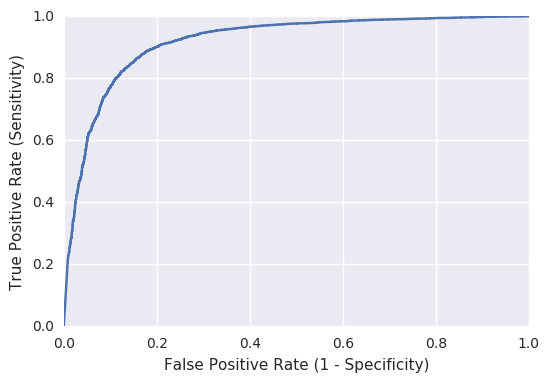

In [85]:
# Plot the ROC Curve
%matplotlib inline
import matplotlib.pyplot as plt
# plot ROC curve using y_test_binary and y_pred_prob
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

In [90]:
train = pd.read_csv('/Users/jmaller/Desktop/ECON628-01-rjmaller/datasets/imdb_kaggle/labeledTrainData.tsv', header=0, \
                    delimiter="\t", quoting=3, encoding='utf-8', skiprows=0, error_bad_lines=False)
#df = pd.read_csv('./movie_data.csv', encoding='utf-8', skiprows=0, error_bad_lines=False)
# Apply Polarity and Sentiment Reviews over our data frame
#Apply polarity and sentiment over yelp reviews df
train["polarity"] = train.review.apply(lambda x:TextBlob(x).polarity)
train["subjectivity"] = train.review.apply(lambda x:TextBlob(x).subjectivity)

In [91]:
train.head(3)

,id,sentiment,review,polarity,subjectivity
0,"""5814_8""",1,"""With all this stuff going down at the moment ...",0.001277,0.606746
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ...",0.256349,0.531111
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell...",-0.053941,0.562933


In [110]:
# Show ten movie reviews with highly positively polarized language
train[train.polarity >.8].review.head(10)

4048     "Adrian Pasdar is excellent is this film. He m...
4543     "Smallville episode Justice is the best episod...
5869     "Melissa Joan Hart shines! This show is amazin...
9041     "\"The Color Purple\", is truly amazing. There...
11815    "This movie had me smiling from beginning to e...
12168    "Smallville episode Justice is the best episod...
12804    "This movie was so good. Leon Phelps is hilari...
14796    "Rating \"10/10\" Master piece<br /><br />Some...
18105    "I watched this film over a hundred times. It ...
18615    "This movie is very good. The screenplay is en...
Name: review, dtype: object

In [113]:
# Show one of the most highly positively polarized reviews
print train.review[4543]

"Smallville episode Justice is the best episode of Smallville ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! It's my favorite episode of Smallville! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! !"


In [114]:
# Show one of the most highly positively polarized reviews
print train.review[5869]

"Melissa Joan Hart shines! This show is amazing!! There is no match. Except for maybe Melissa in Clarissa Explains it All. She was marvelous in that, too. This is SO much better than Buffy, the Vampire Slayer. This show is WONDERFUL!"


In [97]:
# Show ten movie reviews with highly negatively polarized language
train[train.polarity == 0].review.head(10)

548      "The American Humane Association, which is the...
1426     "Clara Bow (Hula Calhoun) is daughter of plant...
2630     "Oh my, this was the worst reunion movie I hav...
4181     "I can't believe they got the actors and actre...
5881     "<br /><br />Human Body --- WoW.<br /><br />Th...
6751     "It's this sort of movie that you try and imit...
8488     "Eleven \"great\" filmmakers, eleven pieces of...
10363    "\"Giant\" is one of the most boring, overly-l...
10961    "This is the story of Australian commandos who...
11037    "<br /><br />Dull Demi, going thru the motions...
Name: review, dtype: object

In [117]:
# Show one of the most highly negatively polarized reviews
print train.review[2630]

"Oh my, this was the worst reunion movie I have ever seen. (That is saying a lot.) I am ashamed of watching.<br /><br />What happened in the script meetings? \"Ooooooh, I know! Let's have two stud muffins fall madly in love with the Most-Annoying-Character-Since-Cousin-Oliver.\" \"Yeah, that'll be cool!\"<br /><br />Even for sitcoms, this was the most implausible plot since Ron Popeil starting spray painting bald men."


In [119]:
# Show one of the most highly negatively polarized reviews
print train.review[4181]

"I can't believe they got the actors and actresses of that caliber to do this movie. That's all I've got to say - the movie speaks for itself!!"


In [120]:
# Show one of the most highly negatively polarized reviews
print train.review[10363]

"\"Giant\" is one of the most boring, overly-long Hollywood contraptions ever. Many scenes seem utterly fake and without energy. Rock Hudson, Elizabeth Taylor, and James Dean are wasted in this big Hollywood production. A central notion to this movie, that a rancher would ever resist drilling for oil on his land, is absurd, and I know this because I'm from Houston. A couple of scenes, especially Dean serving Taylor coffee, redeem this otherwise boring film. For a much more accurate and interesting depiction about how modernism changed the ranches in Texas, see \"Hud\" (one of Paul Newman's great performances) or \"The Last Picture Show.\""


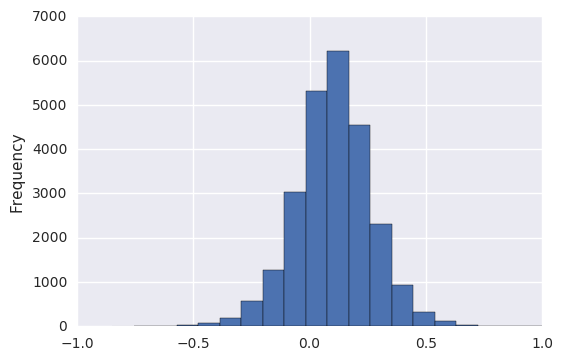

In [121]:
train.polarity.plot(kind="hist", bins=20);
# The graph below shows us that this corpus of movie reviews skews towards positively polarizerd language.
# It intuitively makes sense that most movie reviews that get published have a positive bias

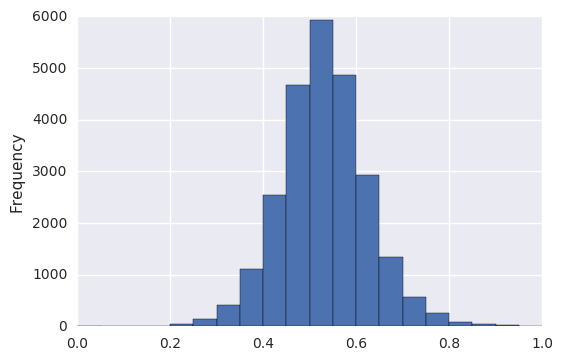

In [122]:
train.subjectivity.plot(kind="hist", bins=20);
# The graph below shows us that this corpus of movie reviews skews towards subjective language.
# It intuitively makes sense that most movie reviews, which are by definition supposed to be critical and subjective 
# contain subjective language

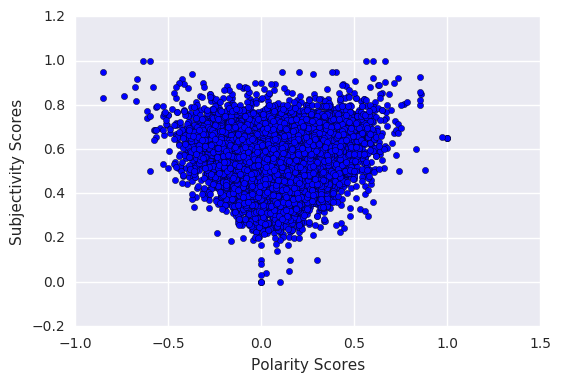

In [123]:
#Plot scatter plot of polarity vs subjectivity scores
plt.scatter(train.polarity, train.subjectivity)
plt.xlabel("Polarity Scores")
plt.ylabel("Subjectivity Scores");

In [ ]:
# This cone shape of this graph (above) confirms the intuitive idea that movie reviews with less 
# subjective language tend to be contain more polarized language and reviews with more subjective 
# language tend to use more positively and negatively polarized language.

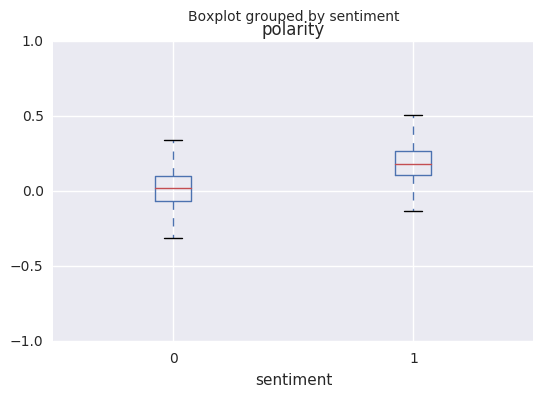

In [124]:
#Plotting boxplots of the polarity by positive and negative reviews
train.boxplot(column='polarity', by='sentiment');

In [ ]:
# It is logical and intuitive that the boxplot above shows that negative reviews contain 
# more negatively polarized language and positive reviews contain more positively polarized language
# The corpus of language in the positive reviews is distinct from the corpus of language in the negative reviews
# The upper quartile of the negative reviews is about as positively polarized as the lower quartile of 
# the positive reviews. It is surprising that the negative reviews aren't more negatively polarized.
# Perhaps reviewers are too polite. Or perhaps they know that to keep their jobs they need to paint a rosy picture of 
# Hollywood movies that were truly bad.


In [ ]:
###
###
###
###
###
#Now we start from the beginning and manually tokenize and create a bag of words 

In [139]:
# define X and y
Xb = train.review
yb = train.sentiment
print yb.value_counts(normalize=True)
print ''
print Xb.shape, yb.shape
print Xb.head()
print yb.head()

1    0.5
0    0.5
Name: sentiment, dtype: float64

(25000,) (25000,)
0    "With all this stuff going down at the moment ...
1    "\"The Classic War of the Worlds\" by Timothy ...
2    "The film starts with a manager (Nicholas Bell...
3    "It must be assumed that those who praised thi...
4    "Superbly trashy and wondrously unpretentious ...
Name: review, dtype: object
0    1
1    1
2    0
3    0
4    1
Name: sentiment, dtype: int64


In [138]:
# Split into test and train data
Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, yb, test_size=0.30, random_state=10)
print Xb_train.shape, yb_train.shape
print Xb_test.shape, yb_test.shape

(17500,) (17500,)
(7500,) (7500,)


In [140]:
# Import BeautifulSoup into your workspace
from bs4 import BeautifulSoup  
# Clean Data using Beautiful Soup
# Use the regular expressions package (re) to clean the text. Removing punctuation, numbers, and emoticons
# We find anything that is not a lowercase or uppercase letter and replacing it with a space
import re
# Import the stopword list 
from nltk.corpus import stopwords
#print stopwords.words("english")

In [141]:
def review_to_words(raw_review):
    # function to convert raw review into a string of words
    # the output is a single string (a processed movie review)
    # 1. remove HTML
    review_text = BeautifulSoup(raw_review).get_text()
    # 2. Remove non-letters
    letters_only = re.sub("[^a-zA-Z]", " ", review_text)
    # 3. Tokenize = Convert to lower case, split into individual words
    words = letters_only.lower().split()
    #4. Convert the stop words to a set to allow faster searching than for a list
    stops = set(stopwords.words("english"))
    #5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]
    #6 Join the wods back into one string seperated by space and return the result
    return( " ".join(meaningful_words))
#clean_review = review_to_words(train["review"][0])
#print clean_review

In [144]:
Xb_train[1]

u'"\\"The Classic War of the Worlds\\" by Timothy Hines is a very entertaining film that obviously goes to great effort and lengths to faithfully recreate H. G. Wells\' classic book. Mr. Hines succeeds in doing so. I, and those who watched his film with me, appreciated the fact that it was not the standard, predictable Hollywood fare that comes out every year, e.g. the Spielberg version with Tom Cruise that had only the slightest resemblance to the book. Obviously, everyone looks for different things in a movie. Those who envision themselves as amateur \\"critics\\" look only to criticize everything they can. Others rate a movie on more important bases,like being entertained, which is why most people never agree with the \\"critics\\". We enjoyed the effort Mr. Hines put into being faithful to H.G. Wells\' classic novel, and we found it to be very entertaining. This made it easy to overlook what the \\"critics\\" perceive to be its shortcomings."'

In [153]:
# Loop through each review to create bag of words
# Get the number of reviews based on the dataframe column size
num_reviews = Xb_train.size
    # Initialize an empty list to hold the clean reviews
clean_train_reviews = []
print "Cleaning and parsing the training set movie reviews...\n"
for i in Xb_train.index:
    clean_train_reviews.append(review_to_words(Xb_train[i]))
print "Creating the bag of words...\n"

Cleaning and parsing the training set movie reviews...

Creating the bag of words...



In [160]:
print clean_train_reviews[1]

oh italians assuming movies aristocrats weird fetishes castles drowned gothic atmosphere back stabbing relatives trying get hands inheritance inherently interesting seen one film type basically seen mst k favorite screaming skull fits mold night evelyn came grave formulaic numbers dull hell even luscious erika blanc put waste zero


In [154]:
##
##
# Creating Bag of Words Features using scikit-learn feature_extraction module
from sklearn.feature_extraction.text import CountVectorizer
# Initialize the "CountVectorizer" object, which is scikit-learn's bag of words tool.  
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000) 
# fit_transform() does two functions: First, it fits the model and learns the vocabulary; second, it 
# transforms our training data into feature vectors. The input to fit_transform should be a list of 
# strings.
train_data_features = vectorizer.fit_transform(clean_train_reviews)
# Numpy arrays are easy to work with, so we convert the result to an array
train_data_features = train_data_features.toarray()

In [155]:
print train_data_features.shape
#our training data array now has 25000 rows and 5000 features (one for each vocabulary word)

(17500, 5000)


In [156]:
# take a look at the words in the vocabulary
vocab = vectorizer.get_feature_names()
print vocab

[u'abandoned', u'abc', u'abilities', u'ability', u'able', u'abraham', u'absence', u'absent', u'absolute', u'absolutely', u'absurd', u'abuse', u'abusive', u'abysmal', u'academy', u'accent', u'accents', u'accept', u'acceptable', u'accepted', u'access', u'accident', u'accidentally', u'accompanied', u'accomplished', u'according', u'account', u'accuracy', u'accurate', u'accused', u'achieve', u'achieved', u'achievement', u'acid', u'across', u'act', u'acted', u'acting', u'action', u'actions', u'activities', u'actor', u'actors', u'actress', u'actresses', u'acts', u'actual', u'actually', u'ad', u'adam', u'adams', u'adaptation', u'adaptations', u'adapted', u'add', u'added', u'addicted', u'adding', u'addition', u'adds', u'adequate', u'admire', u'admit', u'admittedly', u'adorable', u'adult', u'adults', u'advance', u'advanced', u'advantage', u'adventure', u'adventures', u'advertising', u'advice', u'advise', u'affair', u'affect', u'affected', u'affleck', u'afford', u'aforementioned', u'afraid', u'af

In [157]:
import numpy as np
# sum up the counts of each vocabulary word
dist = np.sum(train_data_features, axis=0)
# for eac, print the vocabulary word and the number of times it appears in the training set
for tag, count in zip(vocab, dist):
    print count, tag

135 abandoned
96 abc
73 abilities
323 ability
866 able
61 abraham
71 absence
55 absent
255 absolute
1035 absolutely
208 absurd
135 abuse
61 abusive
62 abysmal
212 academy
338 accent
138 accents
197 accept
86 acceptable
101 accepted
61 access
228 accident
150 accidentally
67 accompanied
87 accomplished
205 according
141 account
60 accuracy
192 accurate
79 accused
132 achieve
106 achieved
73 achievement
63 acid
694 across
904 act
474 acted
4541 acting
2328 action
223 actions
69 activities
1658 actor
3160 actors
852 actress
270 actresses
285 acts
568 actual
2965 actually
92 ad
200 adam
68 adams
312 adaptation
58 adaptations
111 adapted
549 add
295 added
58 addicted
115 adding
227 addition
226 adds
69 adequate
89 admire
427 admit
87 admittedly
60 adorable
379 adult
263 adults
74 advance
63 advanced
118 advantage
332 adventure
142 adventures
63 advertising
187 advice
62 advise
241 affair
58 affect
82 affected
55 affleck
74 afford
82 aforementioned
239 afraid
148 africa
182 african
122 after

In [162]:
# Using Random Forest Classifier to Predict Which Reviews are Good and Bad
print "Training the random forest..."
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest classifier with 100 trees
forest = RandomForestClassifier(n_estimators = 100) 

# Fit the forest to the training set, using the bag of words as 
# features and the sentiment labels as the response variable
#
# This takes a while to run
forest = forest.fit(train_data_features, yb_train)

Training the random forest...


Training the random forest...


In [167]:
# Running Trained Random Forest Classifier Model on our Test Data 
# Read the test data

# Verify that there are XXXX rows in the test data
print Xb_test.shape
print yb_test.shape
#
# Loop through each review to create bag of words
# Initialize an empty list to hold the clean reviews
clean_test_reviews = []
print "Cleaning and parsing the testing set movie reviews...\n"
for i in Xb_test.index:
    clean_test_reviews.append(review_to_words(Xb_test[i]))
print "Creating the bag of words...\n"
#
# Creating a bag of words for the test set, and convert to a numpy array
test_data_features = vectorizer.transform(clean_test_reviews)
test_data_features = test_data_features.toarray()

# Use the random forest to make sentiment label predictions
result = forest.predict(test_data_features)

(7500,)
(7500,)
Cleaning and parsing the testing set movie reviews...

Creating the bag of words...



In [168]:
print 'Accuracy: ', cross_val_score(forest, test_data_features, yb_test, cv=5, scoring='accuracy').mean()

Accuracy:  0.833329836502


In [170]:
# We will print the confusion matrix, and calculate the sensitivity and specificity of the Random Forest 
# classification method
print metrics.confusion_matrix(yb_test, result)

[[3125  576]
 [ 622 3177]]


In [172]:
# Sensitivity is the ability of this method to correctly categorize positive reviews (true positive rate)
# Calculate sensitivity
3177 / float(3177 + 622)

0.836272703342985

In [173]:
# Specificity is the ability of the test to correctly categorize negative reviews (true negative rate)
# Calculate specificity
3125 / float(3125 + 576)

0.8443663874628479

In [174]:
# predict class probabilities
yb_pred_prob = forest.predict_proba(test_data_features)[:, 1]
# calculate the AUC using y_test_binary and y_pred_prob
print metrics.roc_auc_score(yb_test, yb_pred_prob)

0.919915962185


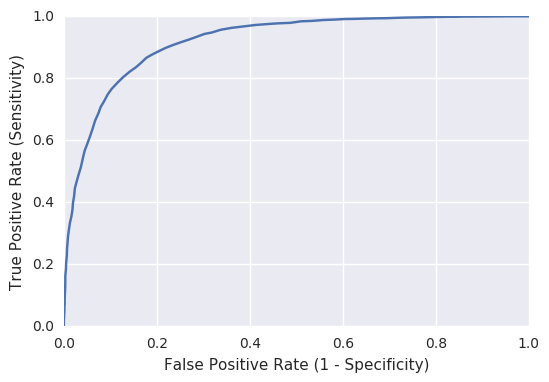

In [175]:
# Plot the ROC Curve
%matplotlib inline
import matplotlib.pyplot as plt
# plot ROC curve using y_test_binary and y_pred_prob
fpr, tpr, thresholds = metrics.roc_curve(yb_test, yb_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

Comparison of Accuracy of Each Model:
The Null Model = .490
Naive Bayes Model with 1-grams and 2-grams = .880
NB Model with stopwords removed = .874
NB Model with stopwords removed and reduced to 100 most important features (faster) = .711
NB Model 1-grams and 2-grams and limiting features to 10,000 = .878
TFIDF Model = .864
Random Forest Model = .833

All of the machine learning models applied to this data do a better job of predicting whether a review is positive or negative than the Null Model. Although the random forest has less accuracy than the TF-IDF and Naive Bayes Models used above, the confusion matrix shows that the random forest has greater sensitivity (but poorer specificity) compared to those models. We conclude that the Random Forest model is better at correctly predicting positive reviews than the Naive Bayes and TF-IDF models. But poorer at correctly predicting negative reviews than the TF-IDF and Naive Bayes Models. In cases where accurately predicting positive reviews is the primary objective, the Random Forest model would be preferred for this data even though it's accuracy score is lower.

In cases where overall accuracy is the most important thing, the Naive Bayes Model with 1-grams and 2-grams is preffered. In cases where computational speed and efficiency is imperative, the NB Model with stopwords removed and reduced to 100 features is preffered, although it has poorer accuracy than the other models.